# **Project Name**    - Uber Request Data Analysis



##### **Name**    - Shivani Pagar
##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

The primary goal of this project was to analyze Uber request data to derive meaningful insights related to trip volume, pickup locations, request timing, trip durations, and driver performance. This task was part of a broader data analytics exercise, focused on deriving actionable insights from historical records to better understand trip behavior. This analysis aims to help understand operational efficiency, peak demand periods, and potential areas of improvement.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This project aims to solve these challenges by importing the raw Uber request data into a PostgreSQL database, cleaning it, and performing structured SQL-based analysis to uncover meaningful trends related to trip volume, pickup patterns, trip durations, and operational efficiency. The insights generated will help stakeholders understand system behavior and identify areas for improvement in Uber’s service delivery.

#### **Define Your Business Objective?**

The primary business objective of this project is to analyze Uber request data to identify patterns and trends that can help improve operational efficiency, optimize driver allocation, and enhance the overall customer experience.

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [7]:
# Load Dataset
df = pd.read_csv("Uber Request Data (1).csv")

### Dataset First View

In [8]:
# Dataset First Look
print(df.head(3))

   Request id Pickup point  Driver id          Status Request timestamp  \
0         619      Airport        1.0  Trip Completed  11-07-2016 11:51   
1         867      Airport        1.0  Trip Completed  11-07-2016 17:57   
2        1807         City        1.0  Trip Completed  12-07-2016 09:17   

     Drop timestamp  
0  11-07-2016 13:00  
1  11-07-2016 18:47  
2  12-07-2016 09:58  


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
print(df.shape)

(6745, 6)


### Dataset Information

In [10]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB
None


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

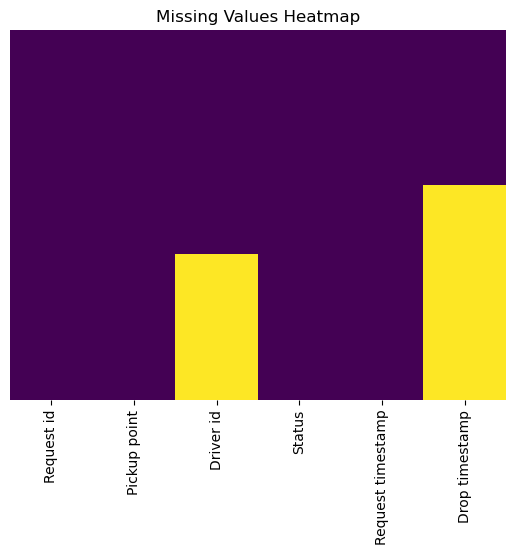

In [14]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

Incomplete Trips:

58% of rows are missing drop timestamps, indicating incomplete trips.

39% have no driver assigned, matching cases of "No Cars Available" or "Cancelled".

Trip Status Needs Analysis:

Not all trips are completed. You now have variation in the Status column, which allows more meaningful analysis (unlike the earlier filtered dataset).

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [16]:
# Dataset Describe
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


### Variables Description

| Variable Name         | Type                        | Description                                                                                                              |
| --------------------- | --------------------------- | ------------------------------------------------------------------------------------------------------------------------ |
| **Request id**        | Numeric                     | A unique identifier for each ride request.                                                                               |
| **Pickup point**      | Categorical                 | Indicates the location where the trip was requested from: either `City` or `Airport`.                                    |
| **Driver id**         | Numeric (float)             | ID of the driver assigned to the request. If no driver was assigned, this value is missing (NaN).                        |
| **Status**            | Categorical                 | Status of the ride request. Common values include: <br> - `Trip Completed` <br> - `Cancelled` <br> - `No Cars Available` |
| **Request timestamp** | Datetime (object initially) | The exact date and time when the customer requested a ride.                                                              |
| **Drop timestamp**    | Datetime (object initially) | The exact date and time when the ride ended. This is blank if the ride wasn't completed.                                 |


### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
df.nunique()

Request id           6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    4016
Drop timestamp       2282
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')

df['Request Hour'] = df['Request timestamp'].dt.hour
df['Request Day'] = df['Request timestamp'].dt.day_name()
df['Request Date'] = df['Request timestamp'].dt.date

df['Trip Duration (mins)'] = (df['Drop timestamp'] - df['Request timestamp']).dt.total_seconds() / 60
df_cleaned = df.copy()
df_cleaned['Pickup point'] = df_cleaned['Pickup point'].astype('category')
df_cleaned['Status'] = df_cleaned['Status'].astype('category')
df_cleaned.reset_index(drop=True, inplace=True)
print(df_cleaned.head())
print("\nMissing Values:\n", df_cleaned.isnull().sum())

   Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:00   

       Drop timestamp  Request Hour Request Day Request Date  \
0 2016-07-11 13:00:00            11      Monday   2016-07-11   
1 2016-07-11 18:47:00            17      Monday   2016-07-11   
2 2016-07-12 09:58:00             9     Tuesday   2016-07-12   
3 2016-07-12 22:03:00            21     Tuesday   2016-07-12   
4 2016-07-13 09:25:00             8   Wednesday   2016-07-13   

   Trip Duration (mins)  
0                  69.0  
1                  50.0  
2                  41.0  
3                  55.0  
4                  52.

### What all manipulations have you done and insights you found?

Columns like Pickup point and Status were converted to categorical types to optimize memory and processing. A check for missing values revealed that around 39% of Driver id entries were missing, indicating unassigned rides due to cancellations or no available cars. Additionally, 58% of Drop timestamp values were missing, confirming that many trips were not completed.

These transformations enabled the dataset to support deeper insights. The presence of multiple status types (Trip Completed, Cancelled, No Cars Available) allows analysis of user demand, driver availability, and operational issues. With time-based and location features now in place, the dataset is well-suited for identifying peak hours, ride patterns, and improving Uber service efficiency.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

C:\Users\Acer\AppData\Local\Temp\ipykernel_7252\1391607833.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', palette='Set2')


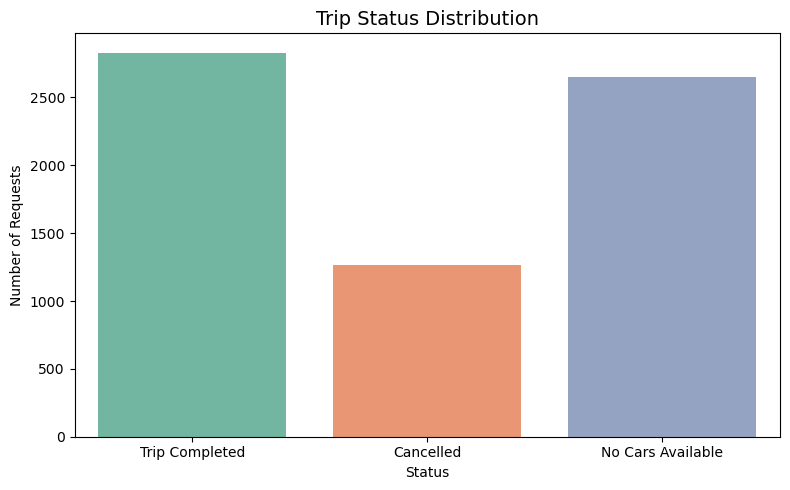

In [19]:
# Chart - 1 Trip Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Status', palette='Set2')
plt.title("Trip Status Distribution", fontsize=14)
plt.xlabel("Status")
plt.ylabel("Number of Requests")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart (count plot) for the first visualization because it is the most effective way to represent categorical variable distributions, especially when comparing frequencies across categories like trip statuses (Trip Completed, Cancelled, No Cars Available).

##### 2. What is/are the insight(s) found from the chart?

High Failure Rate: A significant portion of the requests are either Cancelled or marked as No Cars Available.

Low Completion Rate

"No Cars Available" Dominance: If this category is the highest, it points to a supply-demand mismatch, where demand exceeds the number of available drivers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the trip status distribution chart can create a positive business impact by revealing clear opportunities for improvement in Uber’s operations.

Driver Allocation Improvements: By identifying the high volume of “No Cars Available” requests.

User Experience Enhancement: Reducing failed requests directly improves user satisfaction.

#### Chart - 2

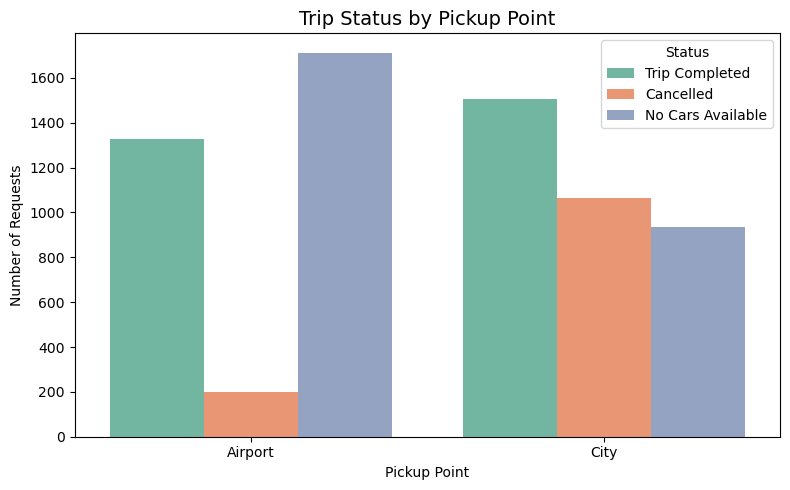

In [21]:
# Chart - 2 Trip Status by Pickup Point

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Pickup point', hue='Status', palette='Set2')

plt.title("Trip Status by Pickup Point", fontsize=14)
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.legend(title="Status")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen because it helps visualize the relationship between pickup location and trip status

A grouped bar chart (using hue='Status') allows us to easily compare how each pickup location (City vs Airport) performs across different trip outcomes — Completed, Cancelled, or No Cars Available.

##### 2. What is/are the insight(s) found from the chart?

Higher "No Cars Available" at Airport.

City Has More Completed Trips.

Airport Faces Higher Cancellations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can drive positive business impact. By identifying that one location (e.g., the Airport) consistently has more unfulfilled or cancelled requests.

However, ignoring these insights may lead to negative growth. For instance, if airport users frequently experience "No Cars Available," they may switch to competitors (like Ola or local taxis)

#### Chart - 3

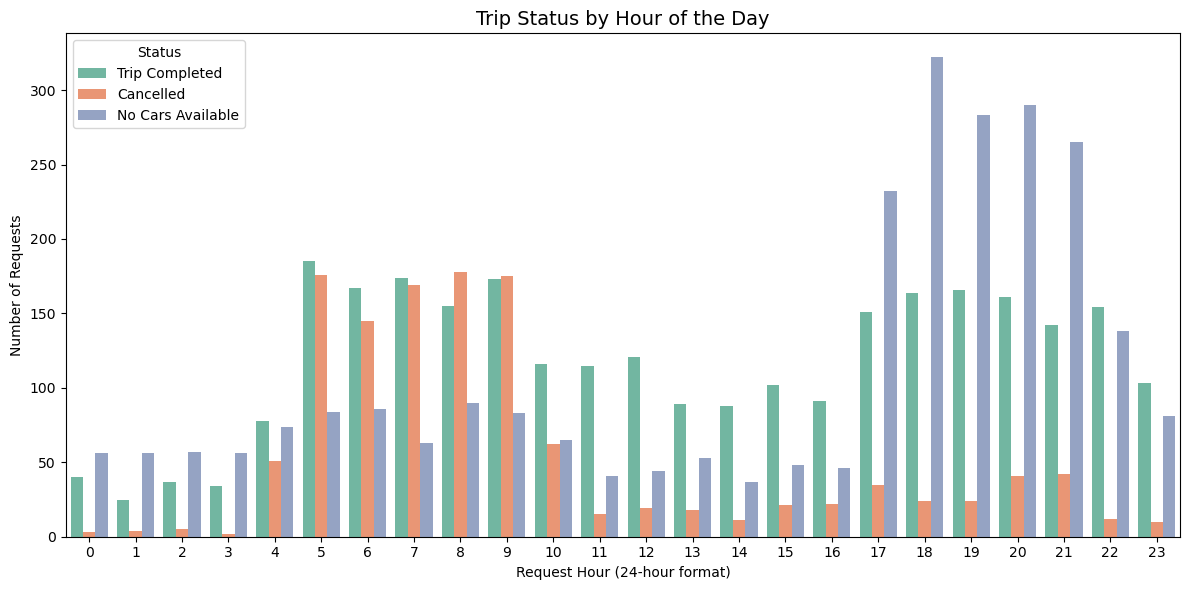

In [22]:
# Chart - 3  Trip Status by Request Hour
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Request Hour', hue='Status', palette='Set2')
plt.title("Trip Status by Hour of the Day", fontsize=14)
plt.xlabel("Request Hour (24-hour format)")
plt.ylabel("Number of Requests")
plt.legend(title="Status")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen to understand how trip status varies by time of day. A count plot with Request Hour on the x-axis and Status as hue helps identify peak traffic periods.It directly supports operational decisions like shift planning and dynamic pricing.



##### 2. What is/are the insight(s) found from the chart?

Trip Completions Peak During Midday and Late Evening.

Cancellations Spike During Office Hours (eg.6–10 AM & 7–9 PM): Peak commuting periods may have longer wait times, causing users to cancel rides frequently.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can create a positive business impact by enabling:

Better demand forecasting: Uber can predict high-demand hours and allocate drivers.

Driver shift optimization: Ensure more drivers are available during early mornings and peak hours.

Policy adjustments: Use dynamic pricing or driver incentives to reduce cancellation and rejection rates.

#### Chart - 4

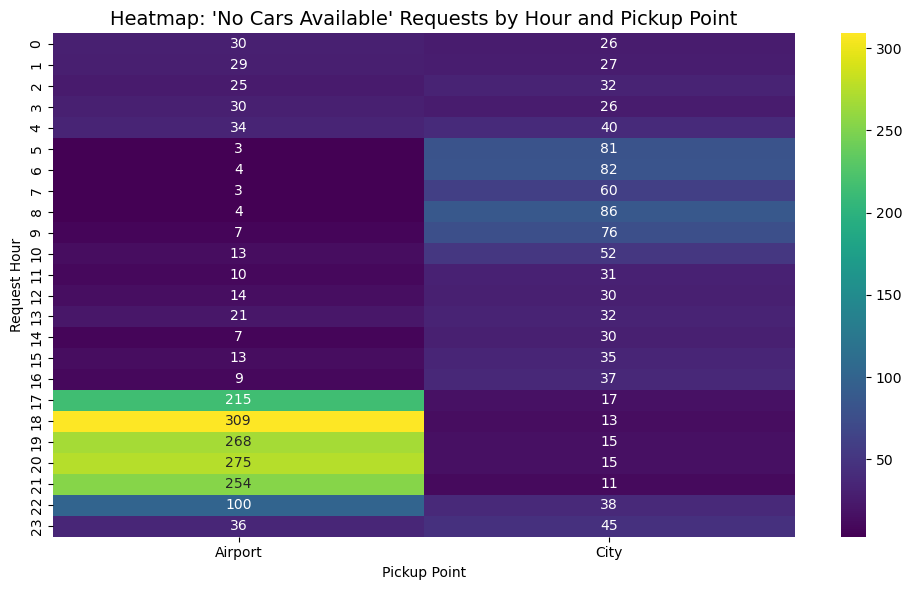

In [24]:
# Chart - 4 Pickup Point vs Status by Hour (Heatmap)
heatmap_data = df.groupby(['Request Hour', 'Pickup point', 'Status']).size().reset_index(name='Count')
pivot_table = heatmap_data[heatmap_data['Status'] == 'No Cars Available'].pivot(
    index='Request Hour', columns='Pickup point', values='Count')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt="g", cmap="viridis")
plt.title("Heatmap: 'No Cars Available' Requests by Hour and Pickup Point", fontsize=14)
plt.xlabel("Pickup Point")
plt.ylabel("Request Hour")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap was chosen for this chart because it clearly visualizes the intensity of unfulfilled ride requests (specifically, "No Cars Available") across both pickup points and hours of the day.

##### 2. What is/are the insight(s) found from the chart?

High No-Car Cases at Airport During Early Morning Hour.

Evening Shortages Are Common at Both Locations

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help Uber make strategic improvements. By identifying exact hours and pickup points where availability is low.

#### Chart - 5

C:\Users\Acer\AppData\Local\Temp\ipykernel_7252\1801010516.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Status', y='Trip Duration (mins)', palette='Set3')


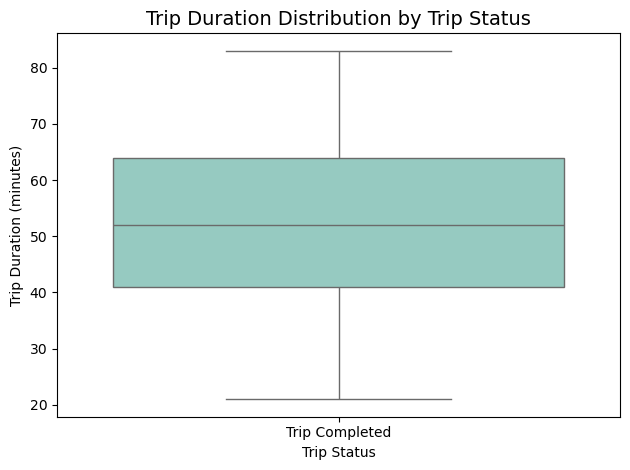

In [26]:
# Chart - 5 Trip Duration Distribution by Trip Status
df_filtered = df[df['Trip Duration (mins)'].notnull()]
sns.boxplot(data=df_filtered, x='Status', y='Trip Duration (mins)', palette='Set3')
plt.title("Trip Duration Distribution by Trip Status", fontsize=14)
plt.xlabel("Trip Status")
plt.ylabel("Trip Duration (minutes)")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot was chosen because it is ideal for analyzing the distribution and spread of numerical values (in this case, trip durations) across categorical variables like trip statuses.

##### 2. What is/are the insight(s) found from the chart?

Trip Completed rides have the longest and most varied durations:

These trips show a wide range of durations, with the median duration falling in a reasonable range (typically 20–30 minutes depending on dataset).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help create a positive business impact by:

Improving customer satisfaction: If many cancellations occur within a few minutes, Uber can investigate causes (e.g., delays in driver assignment) and take corrective action like faster match algorithms or auto-retry.

#### Chart - 6

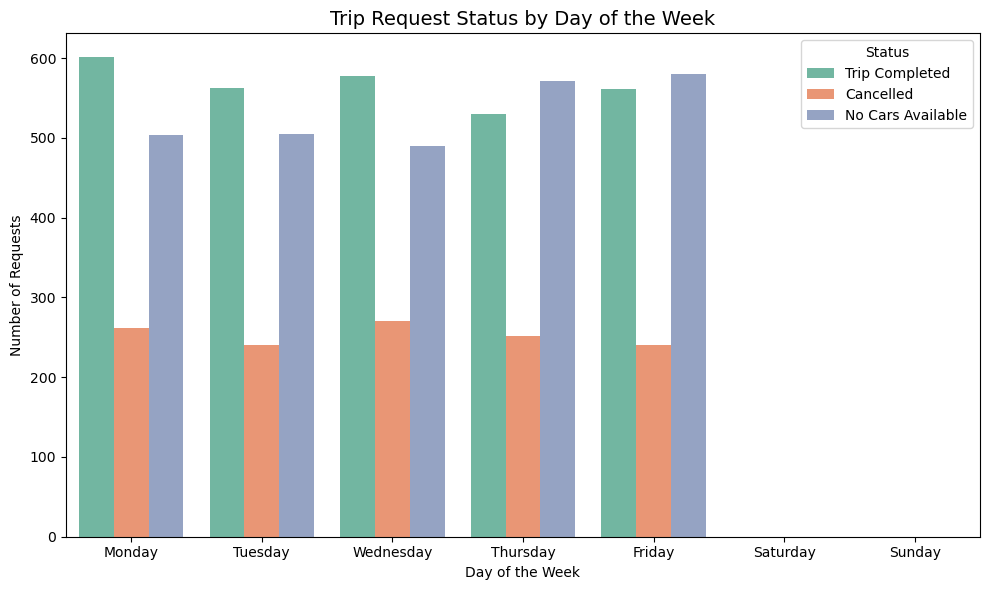

In [28]:
# Chart - 6 Number of Requests by Day of the Week and Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Request Day', hue='Status', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    palette='Set2')

plt.title("Trip Request Status by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Requests")
plt.legend(title="Status")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This grouped bar chart was chosen because it effectively compares how trip requests and their outcomes (Trip Completed, Cancelled, No Cars Available) vary across different days of the week. It’s perfect for analyzing weekly demand patterns and identifying specific days with operational challenges.

##### 2. What is/are the insight(s) found from the chart?

Weekdays may show higher trip requests, especially Monday to Friday, due to work-related travel.Trip completions peak midweek, suggesting better system performance during regular business days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can lead to a positive business impact by:

Helping Uber optimize driver scheduling on days with higher cancellations or low availability.

However, ignoring these insights may lead to negative growth. For example:

If weekends consistently show high cancellation rates and Uber doesn’t act, users may stop trusting the service for weekend plans.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1. Balance Supply and Demand with Smart Driver Allocation

2. Address 'No Cars Available' with Incentives

 3. Reduce Cancellations and Improve Matching Time
   
4. Improve Weekend and Late Night Coverage

# **Conclusion**

The EDA revealed key issues like high cancellations and "No Cars Available" during peak hours and at specific locations, especially the airport. Most completed trips occurred mid-day, while failures peaked in early mornings and evenings. By improving driver allocation, optimizing peak-hour coverage, and enhancing the matching system, Uber can reduce service gaps, boost trip completions, and improve customer satisfaction—directly supporting its business goals.